## 데이터 시각화 실습

### 실습 데이터셋 안내

- Online_Mall_Preprocessing 결과인 Oneline_Mall_Prep.jbl 파일을 읽고<br>
  마케팅 실적 데이터(raw)와 국가의 제품별 평균 가격을 계산한 피벗 테이블(mat)을 생성합니다.<br><br>

- `raw`와 `mat`로 다양한 그래프를 그립니다.

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 그래픽 파라미터를 설정합니다.
plt.rc(group = 'font', family = 'Gowun Dodum', size = 10)
plt.rc(group = 'figure', figsize = (8, 4), dpi = 100)
plt.rc(group = 'axes', unicode_minus = False)
plt.rc(group = 'legend', frameon = True, fc = '1', ec = '0')

### 작업 경로 확인 및 변경

In [3]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/seonghona/Documents/Lectures/Customer/LGE-HE/project/code_answer'

In [4]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [5]:
# 현재 작업 경로에 있는 폴더명과 파일명을 확인합니다.
sorted(os.listdir())

['App_Usage.csv', 'Online_Mall.csv', 'Online_Mall_Prep.jbl']

### 실습 데이터셋 준비

In [6]:
# raw와 mat를 생성합니다.
# [참고] sales_matrix를 mat에 할당합니다.
raw, mat = joblib.load(filename = 'Online_Mall_Prep.jbl')

In [7]:
# raw의 처음 5행을 확인합니다.
raw.head()

country       date category        subcategory  page  cart  vol      usd  \
0      au 2022-01-01       HE                 TV  4485    17   10   398.96   
1      au 2022-01-02       HA       Refrigerator  3419    20    2  1212.33   
2      au 2022-01-02       HE                 TV  4676    14    3   113.99   
3      au 2022-01-03       HA  Cooking_Appliance   546     3    2   279.17   
4      au 2022-01-03       HA       Refrigerator  3691     7    5   106.26   

   month  
0      1  
1      1  
2      1  
3      1  
4      1

In [8]:
# raw의 정보를 확인합니다.
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13901 entries, 0 to 13907
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   country      13901 non-null  object        
 1   date         13901 non-null  datetime64[ns]
 2   category     13901 non-null  object        
 3   subcategory  13901 non-null  object        
 4   page         13901 non-null  int64         
 5   cart         13901 non-null  int64         
 6   vol          13901 non-null  int64         
 7   usd          13901 non-null  float64       
 8   month        13901 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 1.0+ MB


In [9]:
# mat의 처음 5행을 확인합니다.
# [참고] 데이터프레임을 xlsx 파일로 저장했다가 나중에 xlsx 파일을 읽으면 
# 행이름을 초기화한 데이터프레임을 생성하며 결측값이 포함될 수 있습니다.
mat.head()

vol_au  vol_br  vol_de  vol_fr  vol_it  vol_uk  \
category subcategory                                                       
BS       IT_Laptop         107.0   631.0   961.0   785.0   181.0   907.0   
         IT_Monitor        707.0  1774.0  6430.0  2339.0  1670.0  3569.0   
         IT_Projector        NaN   333.0    99.0    64.0     8.0    48.0   
         Monitor           262.0     NaN  1212.0    38.0   204.0    46.0   
HA       Air_Conditioner     NaN  1575.0    44.0     NaN    91.0     NaN   

                             usd_au     usd_br      usd_de      usd_fr  \
category subcategory                                                     
BS       IT_Laptop        120568.37  663428.91  1126577.00   981187.83   
         IT_Monitor       357615.10  588190.34  3933698.88  1201386.73   
         IT_Projector           NaN  197317.69   152640.03   112714.60   
         Monitor           78368.61        NaN   789805.51    16636.96   
HA       Air_Conditioner        NaN  894685.05    24673.91         NaN   

                             usd_it      usd_uk   usd_avg_au   usd_avg_br  \
category subcategory                                                        
BS       IT_Laptop        172380.50   963043.24  1126.807196  1051.392884   
         IT_Monitor       530034.86  2042778.59   505.820509   331.561635   
         IT_Projector       6193.16    77131.10          NaN   592.545616   
         Monitor           47689.95    34222.19   299.116832          NaN   
HA       Air_Conditioner   78008.44         NaN          NaN   568.054000   

                           usd_avg_de   usd_avg_fr  usd_avg_it   usd_avg_uk  
category subcategory                                                         
BS       IT_Laptop        1172.296566  1249.920803  952.378453  1061.789680  
         IT_Monitor        611.772765   513.632634  317.386144   572.367215  
         IT_Projector     1541.818485  1761.165625  774.145000  1606.897917  
         Monitor           651.654711   437.814737  233.774265   743.960652  
HA       Air_Conditioner   560.770682          NaN  857.235604          NaN

In [10]:
# mat의 정보를 확인합니다.
mat.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, ('BS', 'IT_Laptop') to ('HE', 'TV')
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   vol_au      12 non-null     float64
 1   vol_br      10 non-null     float64
 2   vol_de      13 non-null     float64
 3   vol_fr      13 non-null     float64
 4   vol_it      14 non-null     float64
 5   vol_uk      11 non-null     float64
 6   usd_au      12 non-null     float64
 7   usd_br      10 non-null     float64
 8   usd_de      13 non-null     float64
 9   usd_fr      13 non-null     float64
 10  usd_it      14 non-null     float64
 11  usd_uk      11 non-null     float64
 12  usd_avg_au  12 non-null     float64
 13  usd_avg_br  10 non-null     float64
 14  usd_avg_de  13 non-null     float64
 15  usd_avg_fr  13 non-null     float64
 16  usd_avg_it  14 non-null     float64
 17  usd_avg_uk  11 non-null     float64
dtypes: float64(18)
memory usage: 2.2+ KB


### 데이터 전처리

In [11]:
# raw에서 subcategory의 원소가 'TV'인 행을 선택하여 raw_tv에 할당합니다.
raw_tv = raw.loc[raw['subcategory'].eq('TV'), :]

In [12]:
# raw_tv의 행 개수와 열 개수를 확인합니다.
raw_tv.shape

(2064, 9)

In [13]:
# raw_tv의 처음 5행을 확인합니다.
raw_tv.head()

country       date category subcategory  page  cart  vol      usd  month
0       au 2022-01-01       HE          TV  4485    17   10   398.96      1
2       au 2022-01-02       HE          TV  4676    14    3   113.99      1
6       au 2022-01-03       HE          TV  4965    27    9  5806.63      1
12      au 2022-01-04       HE          TV  5035    62   14  3088.30      1
15      au 2022-01-05       HE          TV  4762    65   13  5387.38      1

### 히스토그램 시각화

#### `usd`의 분포를 확인합니다.

In [14]:
# raw_tv에서 usd의 최솟값과 최댓값을 확인합니다.
# [참고] agg()를 사용하세요.
raw_tv['usd'].agg(func = ['min', 'max'])

min       113.99
max    397796.97
Name: usd, dtype: float64

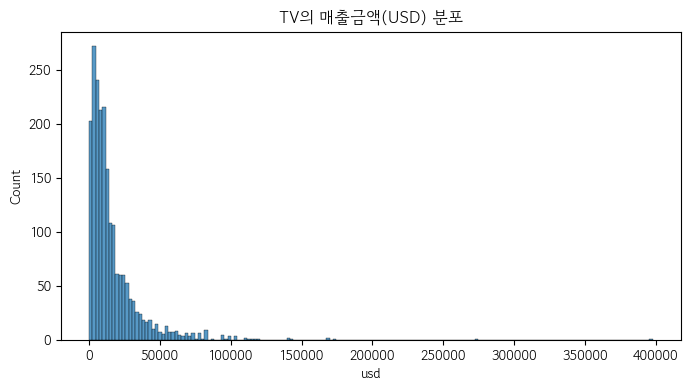

In [15]:
# raw_tv의 usd로 히스토그램을 그립니다.
# [힌트] sns.histplot()를 사용하세요.
sns.histplot(data = raw_tv, x = 'usd')

# 그래프 제목을 'TV의 매출금액(USD) 분포'로 지정합니다.
plt.title(label = 'TV의 매출금액(USD) 분포');

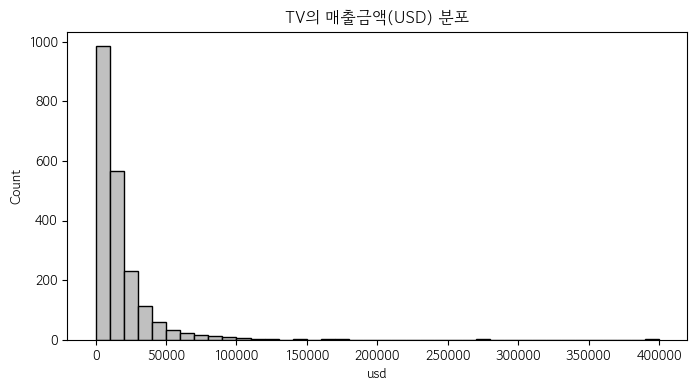

In [16]:
# raw_tv의 usd로 히스토그램을 그립니다.
# 막대 너비는 10000, 막대 범위는 0 ~ 400000, 채우기 색은 'silver', 테두리 색은 'black'으로 설정합니다.
sns.histplot(data = raw_tv, x = 'usd', binwidth = 10000, binrange = (0, 400000), 
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 매출금액(USD) 분포'로 지정합니다.
plt.title(label = 'TV의 매출금액(USD) 분포');

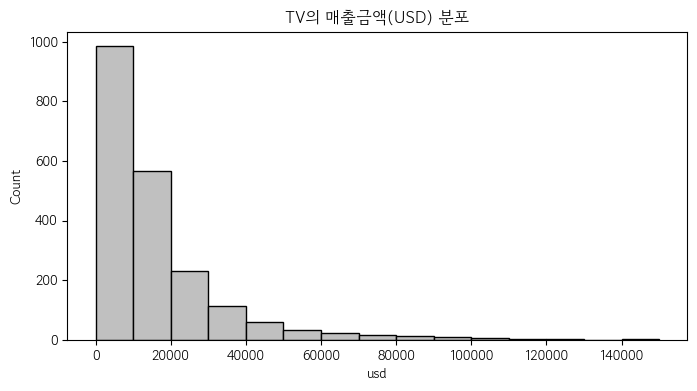

In [17]:
# raw_tv의 usd로 히스토그램을 그립니다.
# 막대 범위의 오른쪽 끝값을 150000으로 변경합니다.
sns.histplot(data = raw_tv, x = 'usd', binwidth = 10000, binrange = (0, 150000), 
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 매출금액(USD) 분포'로 지정합니다.
plt.title(label = 'TV의 매출금액(USD) 분포');

#### `usd`를 `vol`로 나눈 `usd_avg`의 분포를 확인합니다.

In [18]:
# raw_tv에서 usd를 vol로 나누어 usd_avg 열에 할당합니다.
raw_tv['usd_avg'] = raw_tv['usd'] / raw_tv['vol']

/var/folders/lc/r45wk_r122lck74c7vjk86dh0000gn/T/ipykernel_18296/3619788038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['usd_avg'] = raw_tv['usd'] / raw_tv['vol']


In [19]:
# raw_tv에서 usd_avg의 최솟값과 최댓값을 확인합니다.
raw_tv['usd_avg'].agg(func = ['min', 'max'])

min       17.25
max    28049.22
Name: usd_avg, dtype: float64

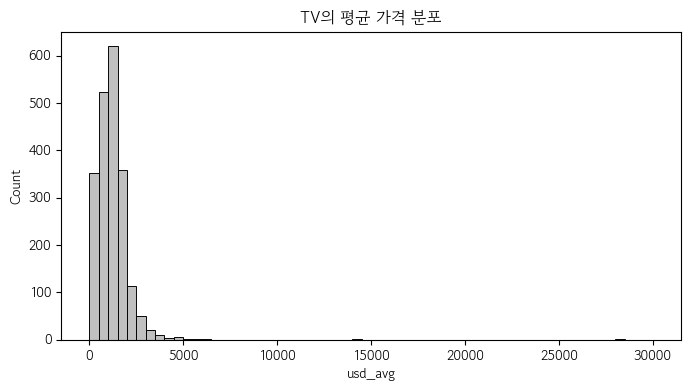

In [20]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
# 막대 너비는 500, 막대 범위는 0 ~ 30000, 채우기 색은 'silver', 테두리 색은 'black'으로 설정합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 500, binrange = (0, 30000), 
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포');

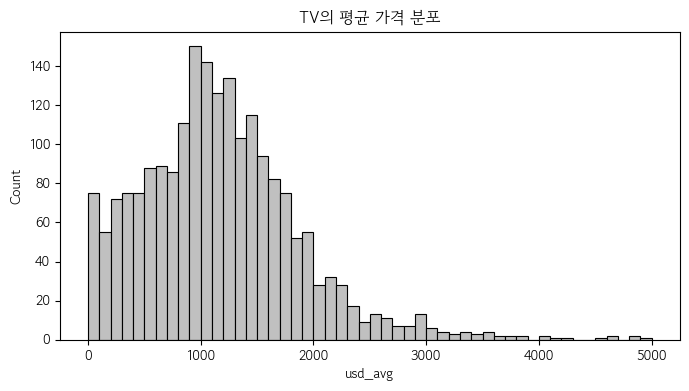

In [21]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
# 막대 너비는 100, 막대 범위의 오른쪽 끝값을 5000으로 변경합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000), 
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포');

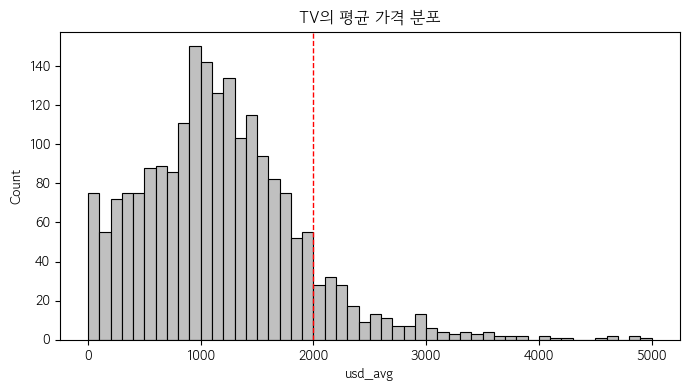

In [22]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000), 
             fc = 'silver', ec = 'black')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포')

# x축이 2000인 수직선을 빨간 점선으로 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

#### 연속형 변수를 구간화하여 범주형 변수를 생성하고 막대 채우기 색을 다르게 설정합니다.

In [23]:
# usd_avg가 2000 이상이면 'high', 아니면 'low'인 문자열을 usd_grd에 할당합니다.
raw_tv['usd_grd'] = np.where(raw_tv['usd_avg'].ge(2000), 'high', 'low')

/var/folders/lc/r45wk_r122lck74c7vjk86dh0000gn/T/ipykernel_18296/1386051408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['usd_grd'] = np.where(raw_tv['usd_avg'].ge(2000), 'high', 'low')


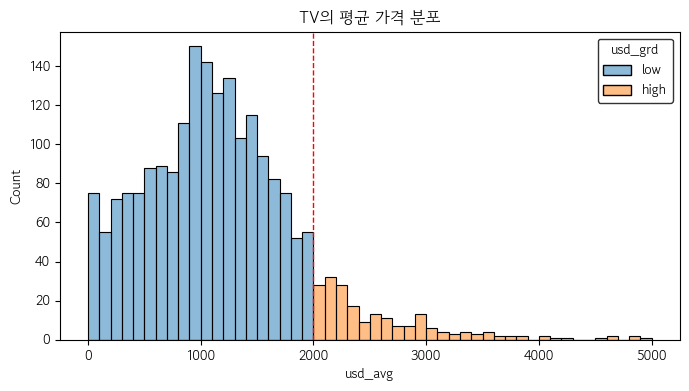

In [24]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
# usd_grd 기준으로 채우기 색을 다르게 설정합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000), 
             hue = 'usd_grd', ec = 'black')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포')

# x축이 2000인 수직선을 빨간 점선으로 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

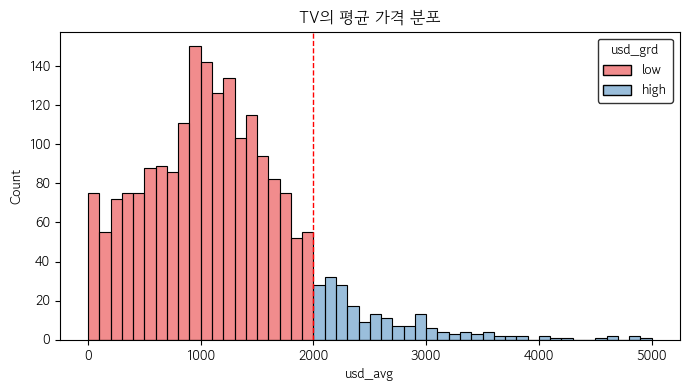

In [25]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
# 팔레트를 'Set1'으로 변경합니다.
# [주의] 팔레트를 지정하려면 반드시 hue 매개변수를 추가해야 합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000), 
             hue = 'usd_grd', ec = 'black', palette = 'Set1')

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포')

# x축이 2000인 수직선을 빨간 점선으로 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

In [26]:
# 색이 'silver', 'red'인 사용자 팔레트를 생성합니다.
myPal = ['silver', 'red']

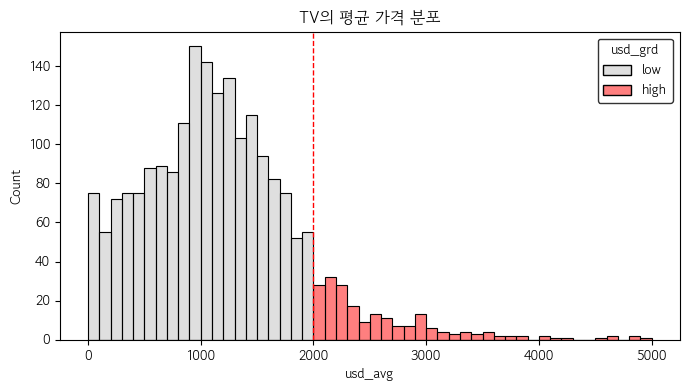

In [27]:
# raw_tv의 usd_avg로 히스토그램을 그립니다.
# 팔레트를 'Set1'에서 사용자 팔레트로 변경합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000), 
             hue = 'usd_grd', ec = 'black', palette = myPal)

# 그래프 제목을 'TV의 평균 가격 분포'로 지정합니다.
plt.title(label = 'TV의 평균 가격 분포')

# x축이 2000인 수직선을 빨간 점선으로 추가합니다.
plt.axvline(x = 2000, color = 'red', lw = 1, ls = '--');

#### 히스토그램을 겹쳐서 그립니다.

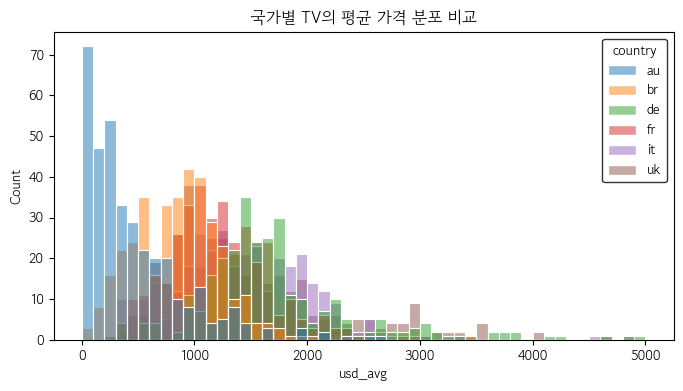

In [28]:
# raw_tv로 country의 범주별 usd_avg의 분포를 히스토그램으로 그립니다.
# 테두리 색을 'white'로 설정합니다.
sns.histplot(data = raw_tv, x = 'usd_avg', binwidth = 100, binrange = (0, 5000),
             hue = 'country', ec = 'white')

# 그래프 제목을 '국가별 TV의 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV의 평균 가격 분포 비교');

#### 커널 밀도 추정 곡선을 겹쳐서 그립니다.

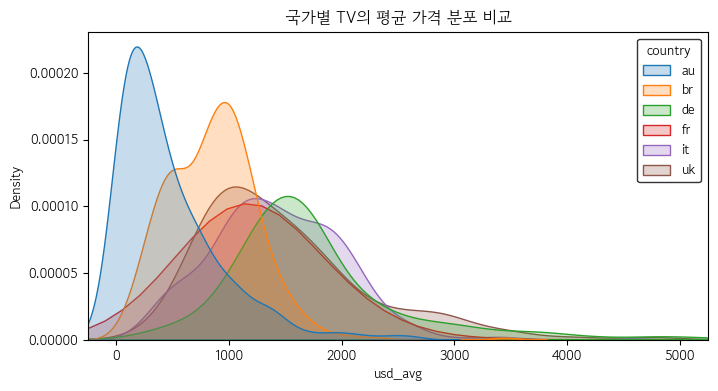

In [29]:
# raw_tv로 country의 범주별 usd_avg의 분포를 커널 밀도 추정곡선으로 그립니다.
# 곡선 아래를 채우도록 설정합니다.
sns.kdeplot(data = raw_tv, x = 'usd_avg', hue = 'country', fill = True)

# 그래프 제목을 '국가별 TV의 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV의 평균 가격 분포 비교')

# x축을 -250 ~ 5250으로 제한합니다.
plt.xlim(-250, 5250);

### 상자 수염 그림 그리기

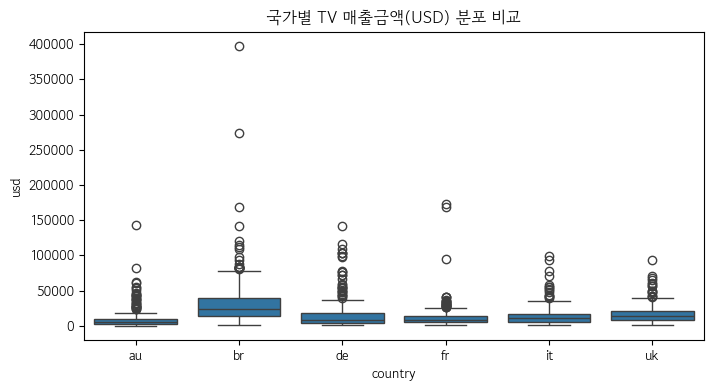

In [30]:
# raw_tv의 country 범주별 usd의 상자 수염 그림을 그립니다.
# [힌트] sns.boxplot()를 사용하세요.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd')

# 그래프 제목을 '국가별 TV 매출금액(USD) 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 매출금액(USD) 분포 비교');

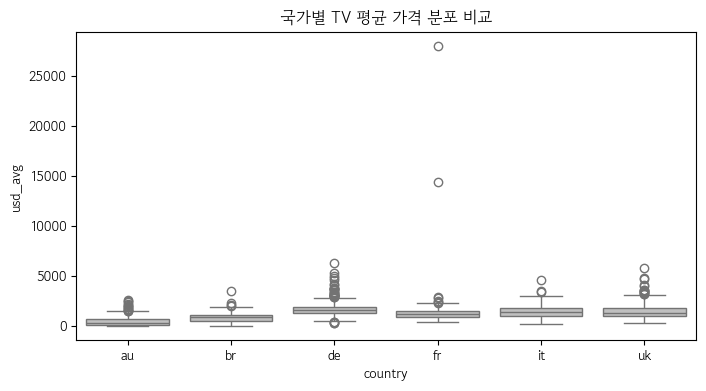

In [31]:
# raw_tv의 country 범주별 usd_avg의 상자 수염 그림을 그립니다.
# 상자의 채우기 색을 'silver'로 설정합니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg', color = 'silver')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교');

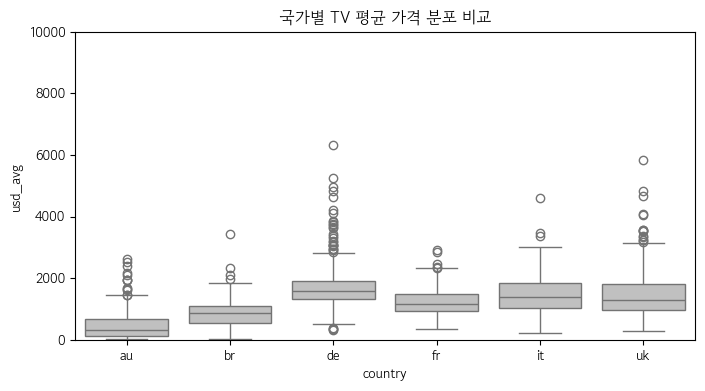

In [32]:
# raw_tv의 country 범주별 usd_avg의 상자 수염 그림을 그립니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg', color = 'silver')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교')

# y축을 0 ~ 10000으로 제한합니다.
plt.ylim(0, 10000);

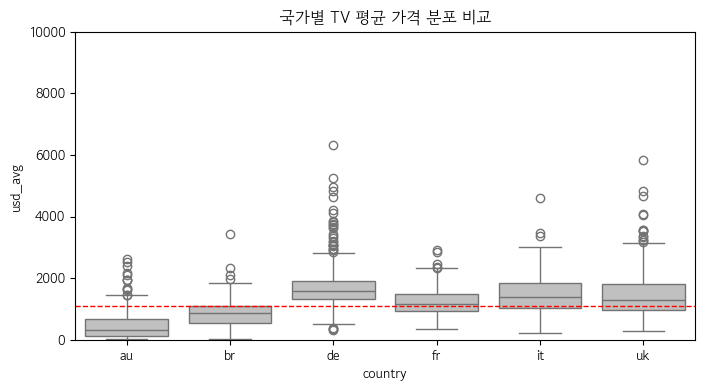

In [33]:
# raw_tv의 country 범주별 usd_avg의 상자 수염 그림을 그립니다.
sns.boxplot(data = raw_tv, x = 'country', y = 'usd_avg', color = 'silver')

# 그래프 제목을 '국가별 TV 평균 가격 분포 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 분포 비교')

# y축을 0 ~ 10000으로 제한합니다.
plt.ylim(0, 10000)

# y축이 usd_avg의 중위수인 수평선을 빨간 점선으로 추가합니다.
plt.axhline(y = raw_tv['usd_avg'].median(), color = 'red', lw = 1, ls = '--');

### 막대 그래프 그리기

In [34]:
# mat를 확인합니다.
mat

vol_au   vol_br  vol_de  vol_fr  vol_it  vol_uk  \
category subcategory                                                          
BS       IT_Laptop           107.0    631.0   961.0   785.0   181.0   907.0   
         IT_Monitor          707.0   1774.0  6430.0  2339.0  1670.0  3569.0   
         IT_Projector          NaN    333.0    99.0    64.0     8.0    48.0   
         Monitor             262.0      NaN  1212.0    38.0   204.0    46.0   
HA       Air_Conditioner       NaN   1575.0    44.0     NaN    91.0     NaN   
         Cooking_Appliance   717.0   1501.0   362.0   196.0   543.0     NaN   
         Dishwasher          386.0      NaN     NaN   141.0   269.0    40.0   
         Dryer               567.0      NaN   206.0   100.0  1433.0   508.0   
         Refrigerator       2320.0    746.0   730.0   541.0  2082.0  1542.0   
         Vacuum_Cleaner      832.0      NaN    24.0    93.0   290.0     NaN   
         Washer             1248.0   5506.0   611.0   377.0  1976.0  1305.0   
         Washer_Dryer        182.0    223.0   234.0   201.0   440.0   669.0   
HE       Audio_CAV           628.0   2423.0   895.0  1233.0   576.0  2592.0   
         TV                 6240.0  13974.0  2745.0  2976.0  3167.0  4480.0   

                                usd_au       usd_br      usd_de      usd_fr  \
category subcategory                                                          
BS       IT_Laptop           120568.37    663428.91  1126577.00   981187.83   
         IT_Monitor          357615.10    588190.34  3933698.88  1201386.73   
         IT_Projector              NaN    197317.69   152640.03   112714.60   
         Monitor              78368.61          NaN   789805.51    16636.96   
HA       Air_Conditioner           NaN    894685.05    24673.91         NaN   
         Cooking_Appliance   130168.31    197218.91    28760.67    41747.69   
         Dishwasher          237703.44          NaN         NaN   100043.82   
         Dryer               447514.86          NaN   145945.68    82572.87   
         Refrigerator       1705464.25   1760975.49   730501.73   693651.44   
         Vacuum_Cleaner      247938.16          NaN    12967.37    39157.52   
         Washer              846950.11   4995831.47   336781.79   305726.66   
         Washer_Dryer        104226.41    497474.30   252817.88   195989.94   
HE       Audio_CAV           207558.48    678336.14   220243.35   377576.81   
         TV                 3071010.74  11627958.45  4562673.27  4017971.88   

                                usd_it      usd_uk   usd_avg_au   usd_avg_br  \
category subcategory                                                           
BS       IT_Laptop           172380.50   963043.24  1126.807196  1051.392884   
         IT_Monitor          530034.86  2042778.59   505.820509   331.561635   
         IT_Projector          6193.16    77131.10          NaN   592.545616   
         Monitor              47689.95    34222.19   299.116832          NaN   
HA       Air_Conditioner      78008.44         NaN          NaN   568.054000   
         Cooking_Appliance    78146.84         NaN   181.545760   131.391679   
         Dishwasher          167639.74    42633.63   615.812021          NaN   
         Dryer               941321.62   617174.48   789.267831          NaN   
         Refrigerator       2531623.45  2851055.29   735.113901  2360.556957   
         Vacuum_Cleaner      136311.52         NaN   298.002596          NaN   
         Washer             1227169.78  1207918.68   678.645921   907.343166   
         Washer_Dryer        340698.05   690194.70   572.672582  2230.826457   
HE       Audio_CAV           171648.63   614750.42   330.507134   279.957136   
         TV                 4563924.62  6078313.74   492.149157   832.113815   

                             usd_avg_de   usd_avg_fr   usd_avg_it   usd_avg_uk  
category subcategory                                                            
BS       IT_Laptop          1172.296566  1249.920803   

In [35]:
# mat에서 'TV'를 포함하는 행이름을 선택한 리스트를 lab_tv에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_tv = [index for index in mat.index if 'TV' in index]

In [36]:
# lab_tv를 확인합니다.
lab_tv

[('HE', 'TV')]

In [37]:
# mat에서 행이름이 lab_tv인 행을 선택하여 mat_tv에 할당합니다.
# [주의] 행이름으로 인덱싱하려면 반드시 loc 인덱서를 사용해야 합니다!
mat_tv = mat.loc[lab_tv, :]

In [38]:
# mat_tv를 확인합니다.
mat_tv

vol_au   vol_br  vol_de  vol_fr  vol_it  vol_uk  \
category subcategory                                                    
HE       TV           6240.0  13974.0  2745.0  2976.0  3167.0  4480.0   

                          usd_au       usd_br      usd_de      usd_fr  \
category subcategory                                                    
HE       TV           3071010.74  11627958.45  4562673.27  4017971.88   

                          usd_it      usd_uk  usd_avg_au  usd_avg_br  \
category subcategory                                                   
HE       TV           4563924.62  6078313.74  492.149157  832.113815   

                       usd_avg_de  usd_avg_fr  usd_avg_it  usd_avg_uk  
category subcategory                                                   
HE       TV           1662.176055  1350.12496  1441.08766  1356.76646

In [39]:
# mat_tv의 열이름을 확인합니다.
mat_tv.columns

Index(['vol_au', 'vol_br', 'vol_de', 'vol_fr', 'vol_it', 'vol_uk', 'usd_au',
       'usd_br', 'usd_de', 'usd_fr', 'usd_it', 'usd_uk', 'usd_avg_au',
       'usd_avg_br', 'usd_avg_de', 'usd_avg_fr', 'usd_avg_it', 'usd_avg_uk'],
      dtype='object')

In [40]:
# mat_tv의 열이름에서 'usd_avg'를 포함하는 열이름을 선택한 리스트를 lab_avg에 할당합니다.
# [힌트] 리스트 컴프리헨션을 사용하세요.
lab_avg = [col for col in mat_tv.columns if 'usd_avg' in col]

In [41]:
# lab_avg를 확인합니다.
lab_avg

['usd_avg_au',
 'usd_avg_br',
 'usd_avg_de',
 'usd_avg_fr',
 'usd_avg_it',
 'usd_avg_uk']

In [42]:
# mat_tv의 열이름에서 'usd_avg'를 포함하는 열만 선택한 데이터프레임을 확인합니다.
mat_tv[lab_avg]

usd_avg_au  usd_avg_br   usd_avg_de  usd_avg_fr  \
category subcategory                                                    
HE       TV           492.149157  832.113815  1662.176055  1350.12496   

                      usd_avg_it  usd_avg_uk  
category subcategory                          
HE       TV           1441.08766  1356.76646

In [43]:
# mat_tv의 열이름에서 'usd_avg'를 포함하는 열을 Long Type으로 변환하고 mat_tv_avg에 할당합니다.
# [힌트] melt()를 사용하세요.
# [참고] 열이름으로 인덱싱할 때는 loc 인덱스를 생략할 수 있습니다.
mat_tv_avg = mat_tv[lab_avg].melt()

In [44]:
# mat_tv_avg의 열이름을 'country', 'usd_avg'로 변경합니다.
mat_tv_avg.columns = ['country', 'usd_avg']

In [45]:
# mat_tv_avg를 확인합니다.
mat_tv_avg

country      usd_avg
0  usd_avg_au   492.149157
1  usd_avg_br   832.113815
2  usd_avg_de  1662.176055
3  usd_avg_fr  1350.124960
4  usd_avg_it  1441.087660
5  usd_avg_uk  1356.766460

In [46]:
# country 열의 원소에서 문자열 'usd_avg_'를 삭제하고 country 열에 재할당합니다.
# [힌트] str.replace()를 사용하세요.
mat_tv_avg['country'] = mat_tv_avg['country'].str.replace(pat = 'usd_avg_', repl = '')

In [47]:
# mat_tv_avg를 확인합니다.
mat_tv_avg

country      usd_avg
0      au   492.149157
1      br   832.113815
2      de  1662.176055
3      fr  1350.124960
4      it  1441.087660
5      uk  1356.766460

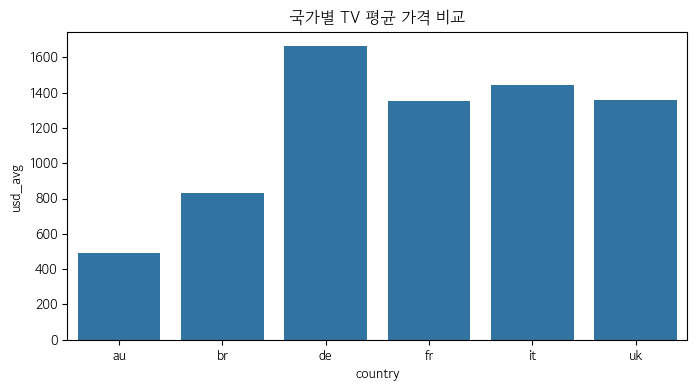

In [48]:
# mat_tv_avg의 country 범주별 usd_avg로 막대 그래프를 그립니다.
# [힌트] sns.barplot()를 사용하세요.
# [참고] estimator 매개변수에 전달하는 인수의 기본값이 'mean'입니다.
sns.barplot(data = mat_tv_avg, x = 'country', y = 'usd_avg')

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교');

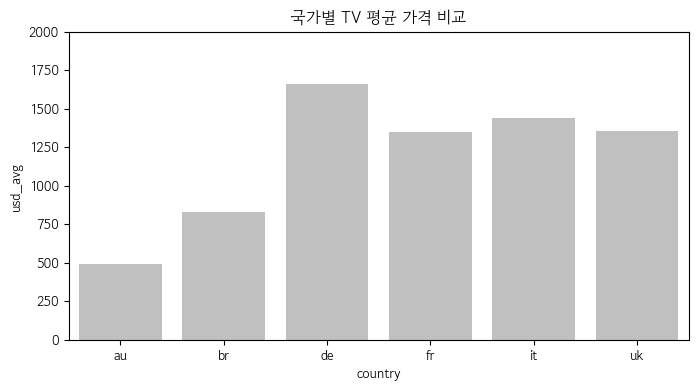

In [49]:
# mat_tv_avg의 country 범주별 usd_avg로 막대 그래프를 그립니다.
# 막대의 채우기 색과 테두리 색을 'silver'로 설정합니다.
sns.barplot(data = mat_tv_avg, x = 'country', y = 'usd_avg', color = 'silver')

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교')

# y축을 0 ~ 2000으로 제한합니다.
plt.ylim(0, 2000);

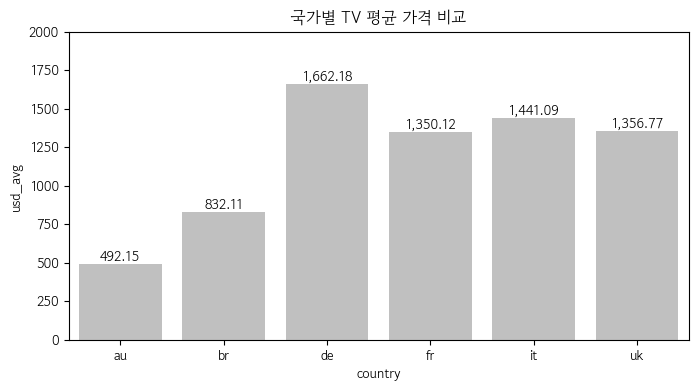

In [50]:
# mat_tv_avg의 country 범주별 usd_avg로 막대 그래프를 그립니다.
sns.barplot(data = mat_tv_avg, x = 'country', y = 'usd_avg', color = 'silver')

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교')

# y축을 0 ~ 2000으로 제한합니다.
plt.ylim(0, 2000)

# 막대 위에 usd_avg를 텍스트로 추가합니다.
# [참고] f-문자열을 사용하여 평균 가격을 소수점 둘째 자리까지 남기면 보기에 좋습니다.
for i, v in enumerate(mat_tv_avg['usd_avg']):
    plt.text(x = i, y = v, s = f'{v:,.2f}', ha = 'center', va = 'bottom')

In [51]:
# 'silver'를 막대 개수만큼 반복한 사용자 팔레트를 생성합니다.
# [참고] 리스트의 반복을 사용하세요.
myPal = ['silver'] * 6

In [52]:
# myPal을 확인합니다.
myPal

['silver', 'silver', 'silver', 'silver', 'silver', 'silver']

In [53]:
# myPal의 세 번째(2번 인덱스) 원소를 'red'로 변경합니다.
myPal[2] = 'red'

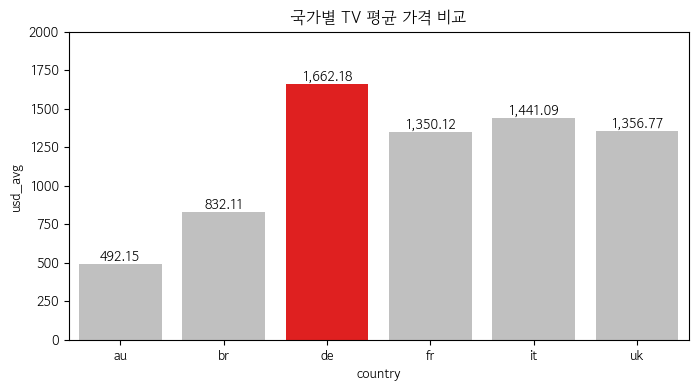

In [54]:
# mat_tv_avg의 country 범주별 usd_avg로 막대 그래프를 그립니다.
# 팔레트를 사용자 팔레트로 변경합니다.
sns.barplot(data = mat_tv_avg, x = 'country', y = 'usd_avg', hue = 'country', palette = myPal)

# 그래프 제목을 '국가별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '국가별 TV 평균 가격 비교')

# y축을 0 ~ 2000으로 제한합니다.
plt.ylim(0, 2000)

# 막대 위에 usd_avg를 텍스트로 추가합니다.
# [참고] f-문자열을 사용하여 평균 가격을 소수점 둘째 자리까지 남기면 보기에 좋습니다.
for i, v in enumerate(mat_tv_avg['usd_avg']):
    plt.text(x = i, y = v, s = f'{v:,.2f}', ha = 'center', va = 'bottom')

#### 요일별 TV 평균 가격으로 막대 그래프를 그립니다.

In [55]:
# raw_tv의 처음 5행을 확인합니다.
raw_tv.head()

country       date category subcategory  page  cart  vol      usd  month  \
0       au 2022-01-01       HE          TV  4485    17   10   398.96      1   
2       au 2022-01-02       HE          TV  4676    14    3   113.99      1   
6       au 2022-01-03       HE          TV  4965    27    9  5806.63      1   
12      au 2022-01-04       HE          TV  5035    62   14  3088.30      1   
15      au 2022-01-05       HE          TV  4762    65   13  5387.38      1   

       usd_avg usd_grd  
0    39.896000     low  
2    37.996667     low  
6   645.181111     low  
12  220.592857     low  
15  414.413846     low

In [56]:
# raw_tv의 date에서 요일을 '0-Sun' ~ '6-Sat' 형태의 문자열로 추출하여 day_name에 할당합니다.
raw_tv['day_name'] = raw_tv['date'].dt.strftime('%w-%a')

/var/folders/lc/r45wk_r122lck74c7vjk86dh0000gn/T/ipykernel_18296/1090201175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_tv['day_name'] = raw_tv['date'].dt.strftime('%w-%a')


In [57]:
# raw_tv의 처음 5행을 확인합니다.
raw_tv.head()

country       date category subcategory  page  cart  vol      usd  month  \
0       au 2022-01-01       HE          TV  4485    17   10   398.96      1   
2       au 2022-01-02       HE          TV  4676    14    3   113.99      1   
6       au 2022-01-03       HE          TV  4965    27    9  5806.63      1   
12      au 2022-01-04       HE          TV  5035    62   14  3088.30      1   
15      au 2022-01-05       HE          TV  4762    65   13  5387.38      1   

       usd_avg usd_grd day_name  
0    39.896000     low    6-Sat  
2    37.996667     low    0-Sun  
6   645.181111     low    1-Mon  
12  220.592857     low    2-Tue  
15  414.413846     low    3-Wed

In [58]:
# raw_tv의 day_name 범주별 usd의 평균을 계산하고 grp에 할당합니다.
grp = raw_tv.groupby(by = 'day_name')['usd'].mean()

In [59]:
# grp를 확인합니다.
grp

day_name
0-Sun    12509.362569
1-Mon    17121.570507
2-Tue    17707.324384
3-Wed    17642.233624
4-Thu    17386.621089
5-Fri    18364.987109
6-Sat    14183.599556
Name: usd, dtype: float64

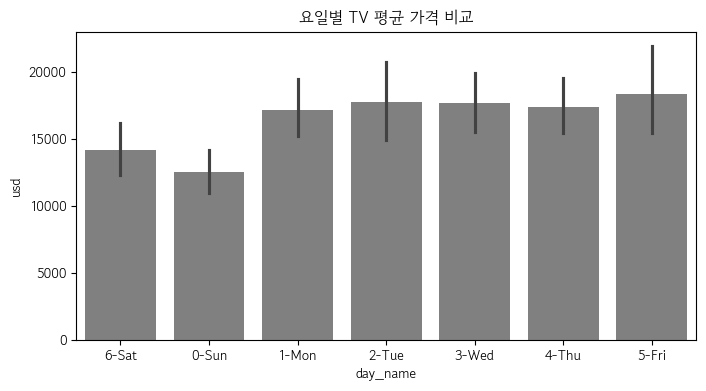

In [60]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
# 막대의 채우기 색과 테두리 색은 'gray'로 설정합니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray')

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교');

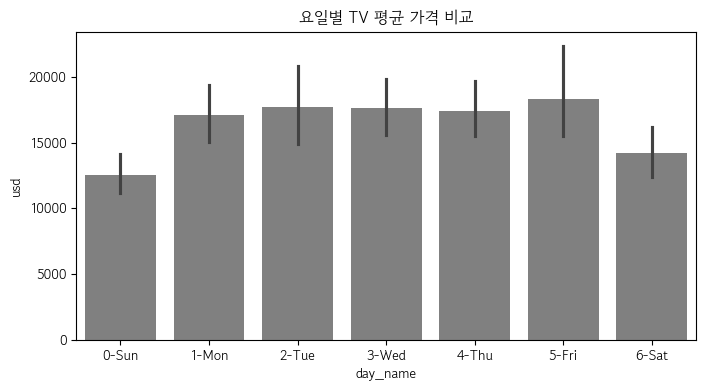

In [61]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
# x축명의 순서를 grp.index로 설정합니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray', 
            order = grp.index)

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교');

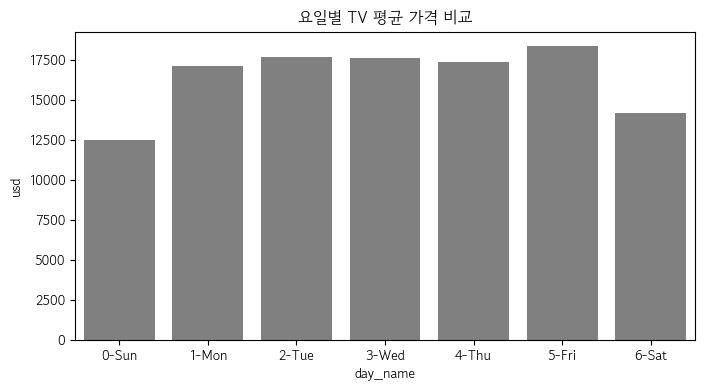

In [62]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
# 95% 신뢰구간을 표시하지 않도록 설정합니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray', 
            order = grp.index, errorbar = None)

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교');

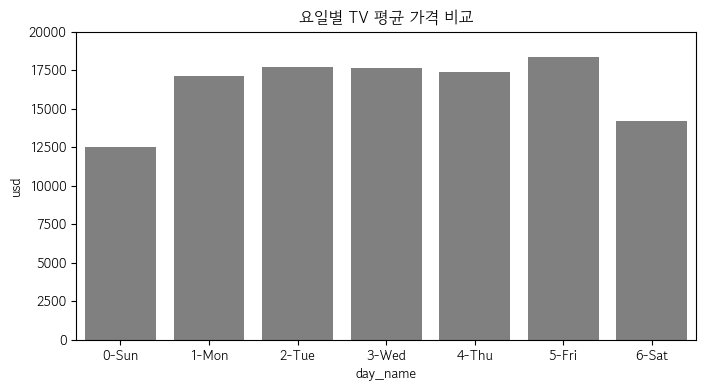

In [63]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray', 
            order = grp.index, errorbar = None)

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교')

# y축을 0 ~ 20000으로 제한합니다.
plt.ylim(0, 20000);

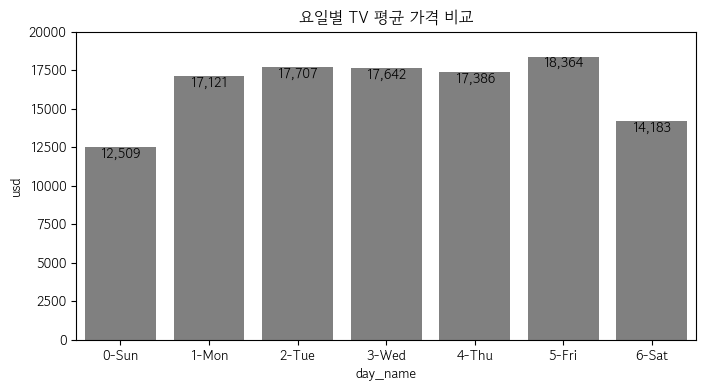

In [64]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray', 
            order = grp.index, errorbar = None)

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교')

# y축을 0 ~ 20000으로 제한합니다.
plt.ylim(0, 20000)

# 막대 안에 usd 평균 가격을 텍스트로 추가합니다.
# [참고] f-문자열을 사용하여 평균 가격에 천 단위 구분자(,)를 표시하면 보기에 좋습니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v, s = f'{int(v):,}', ha = 'center', va = 'top');

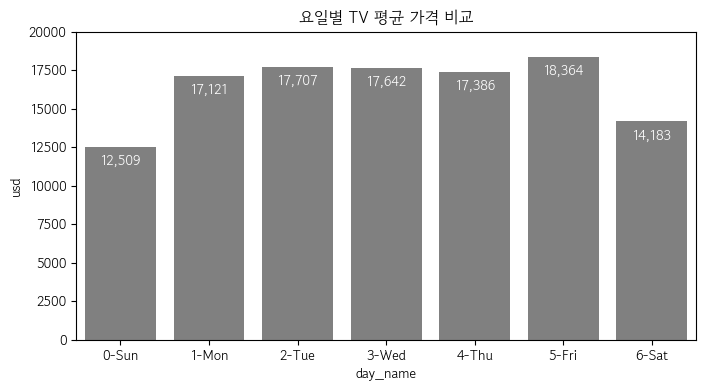

In [65]:
# raw_tv의 day_name 범주별 usd 평균으로 막대 그래프를 그립니다.
sns.barplot(data = raw_tv, x = 'day_name', y = 'usd', color = 'gray', 
            order = grp.index, errorbar = None)

# 그래프 제목을 '요일별 TV 평균 가격 비교'로 지정합니다.
plt.title(label = '요일별 TV 평균 가격 비교')

# y축을 0 ~ 20000으로 제한합니다.
plt.ylim(0, 20000)

# 막대 안에 usd 평균 가격을 텍스트로 추가합니다.
# plt.text()의 y 매개변수에 적당한 값을 차감하고 글자색을 'white'로 설정합니다.
# [참고] f-문자열을 사용하여 평균 가격에 천 단위 구분자(,)를 표시하면 보기에 좋습니다.
for i, v in enumerate(grp):
    plt.text(x = i, y = v - 500, s = f'{int(v):,}', ha = 'center', va = 'top', color = 'white');

### 선 그래프 그리기

In [66]:
# raw_tv의 처음 5행을 확인합니다.
raw_tv.head()

country       date category subcategory  page  cart  vol      usd  month  \
0       au 2022-01-01       HE          TV  4485    17   10   398.96      1   
2       au 2022-01-02       HE          TV  4676    14    3   113.99      1   
6       au 2022-01-03       HE          TV  4965    27    9  5806.63      1   
12      au 2022-01-04       HE          TV  5035    62   14  3088.30      1   
15      au 2022-01-05       HE          TV  4762    65   13  5387.38      1   

       usd_avg usd_grd day_name  
0    39.896000     low    6-Sat  
2    37.996667     low    0-Sun  
6   645.181111     low    1-Mon  
12  220.592857     low    2-Tue  
15  414.413846     low    3-Wed

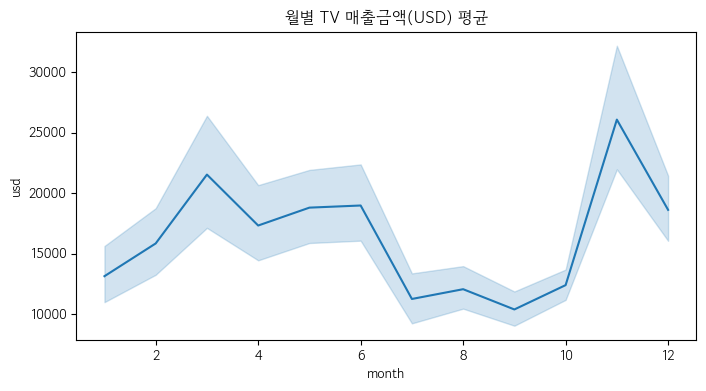

In [67]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
# [힌트] sns.lineplot()를 사용하세요.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균');

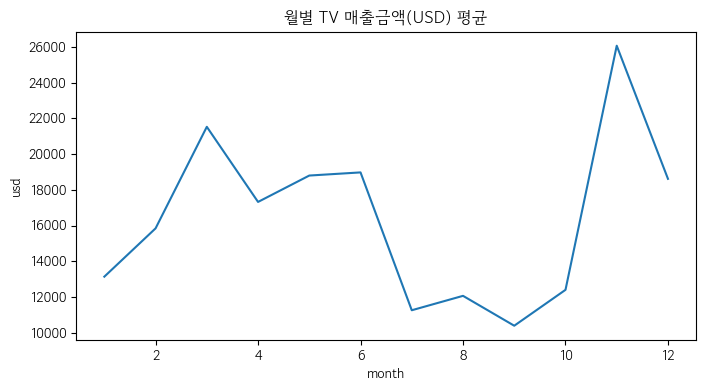

In [68]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
# 95% 신뢰구간을 표시하지 않도록 설정합니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', errorbar = None)

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균');

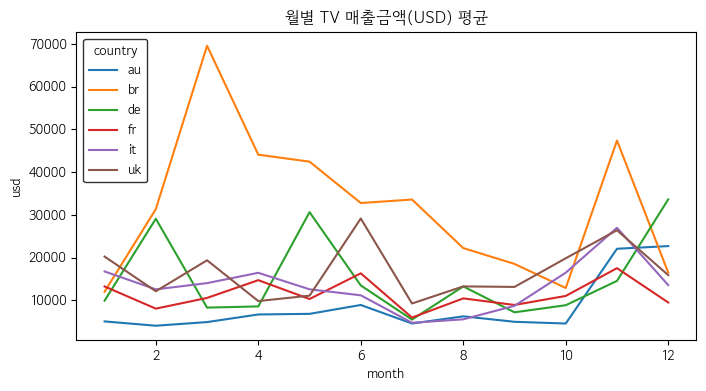

In [69]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
# country 범주별로 선의 색을 다르게 설정합니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', errorbar = None, 
             hue = 'country')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균');

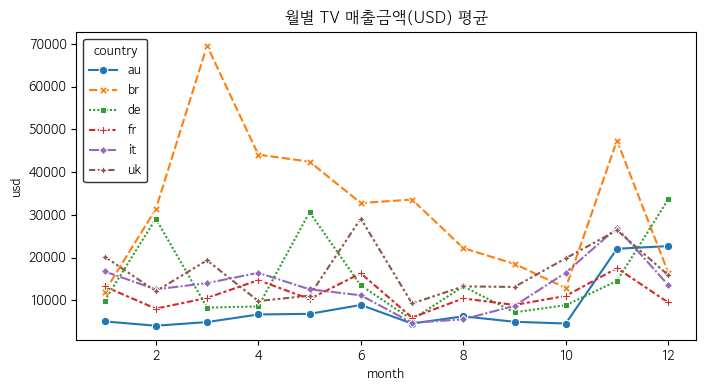

In [70]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
# country 범주별로 마커와 선의 모양을 다르게 설정합니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', errorbar = None, 
             hue = 'country', markers = True, style = 'country')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균');

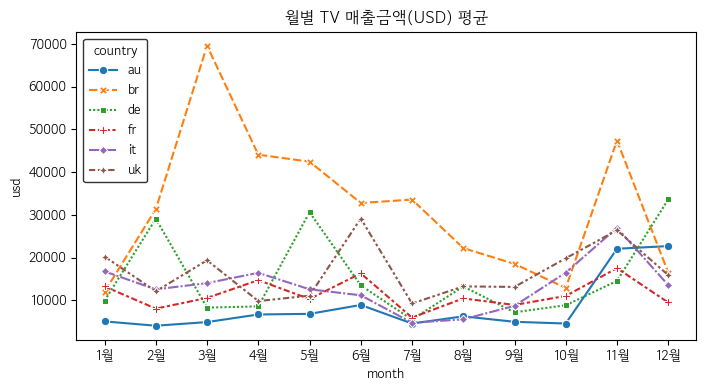

In [71]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', errorbar = None, 
             hue = 'country', markers = True, style = 'country')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균')

# x축명을 '1월' ~ '12월'의 문자열로 설정합니다.
# [참고] 리스트 컴프리헨션과 f-문자열을 사용하세요.
plt.xticks(ticks = range(1, 13), labels = [f'{i}월' for i in range(1, 13)]);

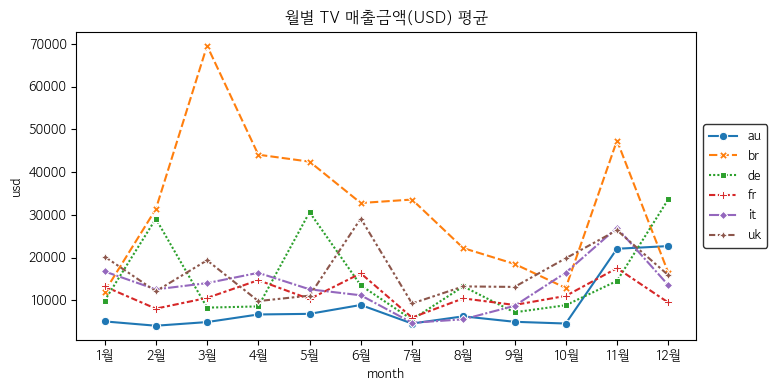

In [72]:
# raw_tv의 month 범주별 국가의 usd 평균을 선 그래프로 그립니다.
sns.lineplot(data = raw_tv, x = 'month', y = 'usd', errorbar = None, 
             hue = 'country', markers = True, style = 'country')

# 그래프 제목을 '월별 TV 매출금액(USD) 평균'으로 지정합니다.
plt.title(label = '월별 TV 매출금액(USD) 평균')

# x축명을 '1월' ~ '12월'의 문자열로 설정합니다.
plt.xticks(ticks = range(1, 13), labels = [f'{i}월' for i in range(1, 13)]);

# 범례 위치를 오른쪽 바깥으로 변경합니다.
plt.legend(loc = 'center left', bbox_to_anchor = [1, 0.5]);

### 산점도 그리기

In [73]:
# raw_tv의 처음 5행을 확인합니다.
raw_tv.head()

country       date category subcategory  page  cart  vol      usd  month  \
0       au 2022-01-01       HE          TV  4485    17   10   398.96      1   
2       au 2022-01-02       HE          TV  4676    14    3   113.99      1   
6       au 2022-01-03       HE          TV  4965    27    9  5806.63      1   
12      au 2022-01-04       HE          TV  5035    62   14  3088.30      1   
15      au 2022-01-05       HE          TV  4762    65   13  5387.38      1   

       usd_avg usd_grd day_name  
0    39.896000     low    6-Sat  
2    37.996667     low    0-Sun  
6   645.181111     low    1-Mon  
12  220.592857     low    2-Tue  
15  414.413846     low    3-Wed

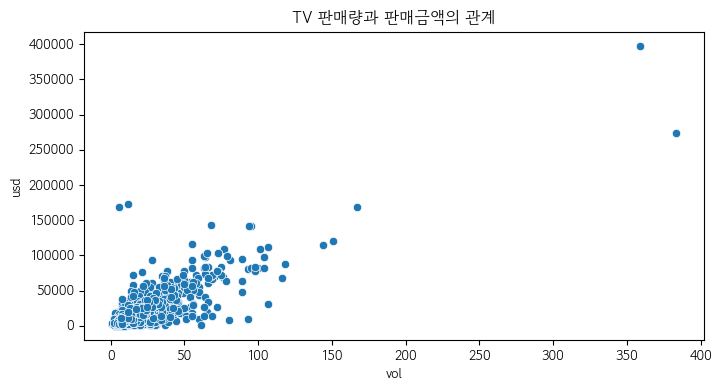

In [74]:
# raw_tv의 vol을 x축, usd를 y축에 놓고 산점도를 그립니다.
# [참고] sns.scatterplot()을 사용하세요.
sns.scatterplot(data = raw_tv, x = 'vol', y = 'usd')

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계');

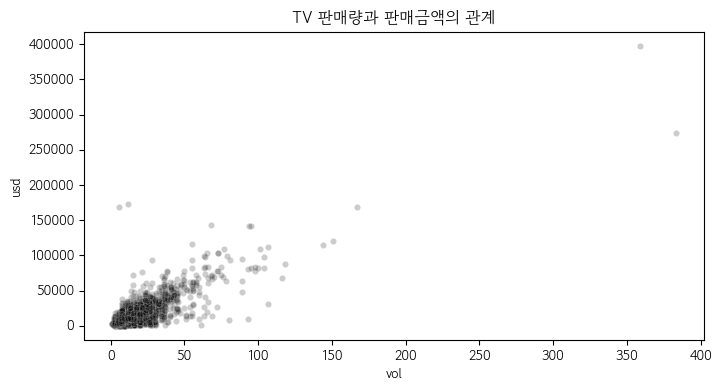

In [75]:
# raw_tv의 vol을 x축, usd를 y축에 놓고 산점도를 그립니다.
# 점의 채우기 색을 'black', 테두리 색을 'white', 크기를 20, 투명도를 0.2로 설정합니다.
sns.scatterplot(data = raw_tv, x = 'vol', y = 'usd', 
                fc = 'black', ec = 'white', s = 20, alpha = 0.2)

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계');

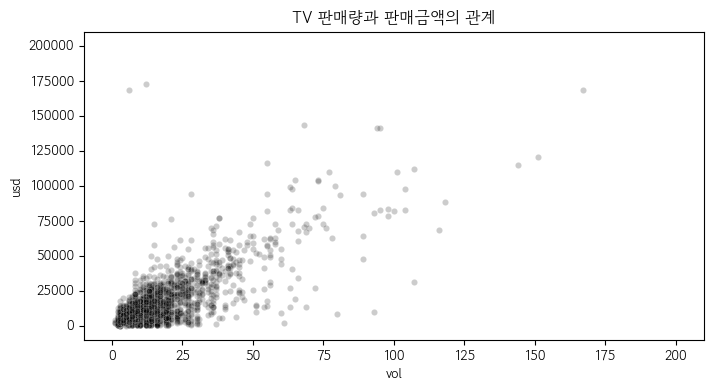

In [76]:
# raw_tv의 vol을 x축, usd를 y축에 놓고 산점도를 그립니다.
# 점의 채우기 색을 'black', 테두리 색을 'white', 크기를 20, 투명도를 0.2로 설정합니다.
sns.scatterplot(data = raw_tv, x = 'vol', y = 'usd', 
                fc = 'black', ec = 'white', s = 20, alpha = 0.2)

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계')

# x축을 -10 ~ 210으로 제한합니다.
plt.xlim(-10, 210)

# y축을 -10000 ~ 210000으로 제한합니다.
plt.ylim(-10000, 210000);

#### 산점도에 회귀직선을 추가합니다.

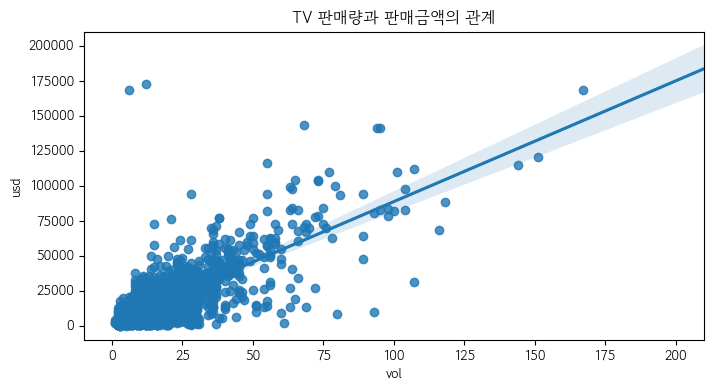

In [77]:
# 산점도에 회귀직선을 추가합니다.
# [참고] sns.regplot()를 사용하세요.
sns.regplot(data = raw_tv, x = 'vol', y = 'usd')

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계')

# x축을 -10 ~ 210으로 제한합니다.
plt.xlim(-10, 210)

# y축을 -10000 ~ 210000으로 제한합니다.
plt.ylim(-10000, 210000);

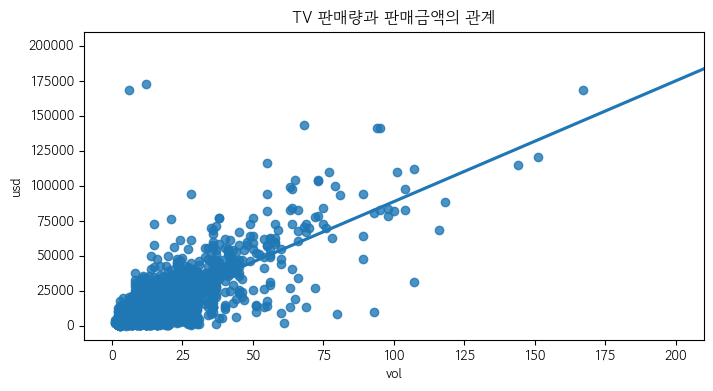

In [78]:
# 산점도에 회귀직선을 추가합니다.
# 회귀직선에서 95% 신뢰구간을 표시하지 않도록 설정합니다.
sns.regplot(data = raw_tv, x = 'vol', y = 'usd', ci = None)

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계')

# x축을 -10 ~ 210으로 제한합니다.
plt.xlim(-10, 210)

# y축을 -10000 ~ 210000으로 제한합니다.
plt.ylim(-10000, 210000);

In [79]:
# 점과 회귀직선 관련 그래픽 요소를 딕셔너리로 생성합니다.
scatter = dict(fc = 'black', ec = 'white', s = 20, alpha = 0.2)
regline = dict(color = 'red', lw = 1.5)

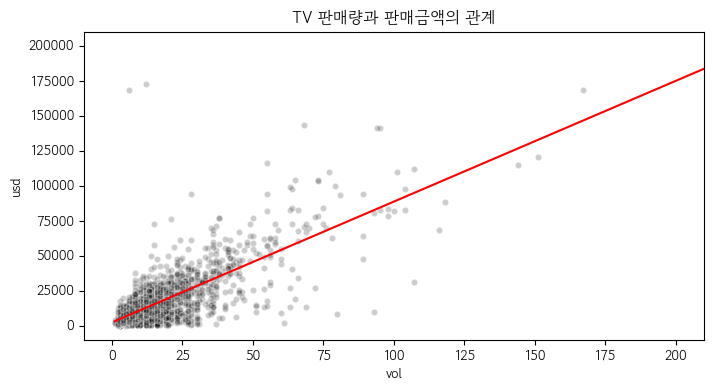

In [80]:
# 산점도에 회귀직선을 추가합니다.
sns.regplot(data = raw_tv, x = 'vol', y = 'usd', ci = None, 
            scatter_kws = scatter, line_kws = regline)

# 그래프 제목을 'TV 판매량과 판매금액의 관계'로 지정합니다.
plt.title(label = 'TV 판매량과 판매금액의 관계')

# x축을 -10 ~ 210으로 제한합니다.
plt.xlim(-10, 210)

# y축을 -10000 ~ 210000으로 제한합니다.
plt.ylim(-10000, 210000);

## End of Document